# Make Posterior Bananas!

Make the following images:
1. Figure 2
2. Extended Data Figure 1
3. Extended Data Figure 3
4. Posteriors Table in latex


### move these into posteriors/, with stripped down names



In [1]:

# basic imports
from __future__ import print_function
import numpy as np
from numpy.linalg import eig, inv
import time

# plotting elements
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import matplotlib as mpl
mpl.rcParams['font.weight'] = 'medium'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
cmap = cm.RdBu_r

# interpolate the distance function to select mock stars

#from scipy.interpolate import interp1d

mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
    
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8

mpl.rcParams['axes.linewidth'] = 1.2
mpl.rcParams['xtick.major.width'] = 1.2
mpl.rcParams['ytick.major.width'] = 1.2
mpl.rcParams['ytick.major.width'] = 1.2
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False


# exptool imports
from reflexmotion import kde as kde_3d
from reflexmotion import posteriorreader as pr


import scipy.interpolate as interpolate
from scipy.interpolate import UnivariateSpline
import scipy

# ipython reload capabilities for edits to external code
%load_ext autoreload
%autoreload 2



In [2]:

SAT     = pr.read_posterior('posteriors/satellites_mcconnachie_minimum.posteriors')
BHB     = pr.read_posterior('posteriors/BHBs_d040150_sgr20_L3000_lanc_corr.posteriors2')
KGiants = pr.read_posterior('posteriors/KGiants_d040150_sgr20_L3000_corr.posteriors2')
ALL     = pr.read_posterior('posteriors/all_d040150_sgr20_L3000_cov.posteriors2')

cats = ['vtravel','phi','theta','sigmar','sigmap','sigmat','vra','vth','vphi']
dictnames = [ALL,BHB,KGiants,SAT]


bounddict = pr.total_bounds(dictnames,cats)

satcolor='orange'
    

In [4]:
# bring in the mock data

indir = 'posteriors/'

S13 = pr.read_posterior(indir+'mock_live_s13_35k_d040150.posteriors')
S14 = pr.read_posterior(indir+'mock_live_s14_35k_d040150.posteriors')
S15 = pr.read_posterior(indir+'mock_live_s15_35k_d040150.posteriors')




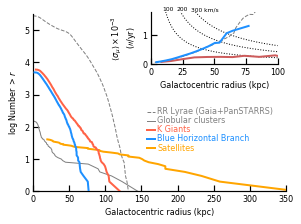

In [6]:
final_data = 'data/'

# interpolate the distance function to select mock stars
   
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
    
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8

mpl.rcParams['axes.linewidth'] = 1.2
mpl.rcParams['xtick.major.width'] = 1.2
mpl.rcParams['ytick.major.width'] = 1.2
mpl.rcParams['ytick.major.width'] = 1.2
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False




fig = plt.figure(figsize=(4.0,3))
ax = fig.add_axes([0.08,0.13,0.88,0.82])


I = np.genfromtxt('processed/rrldistdist.txt')
I = np.genfromtxt('processed/rrldistdist_kpc.txt')


radj = I[:,0]; num = I[:,1]
ax.plot(radj,np.log10(num),color='gray',linestyle='dashed',lw=1.)


# GCs
In = np.genfromtxt(final_data+'GCs_cartesian_heliocentric.txt',skip_header=1)
d = In[:,8]
dsort = d.argsort()
nrange = np.arange(0.,d.size,1)
radj = d[dsort]
num = d.size - nrange

ax.plot(radj,np.log10(num),color='gray',lw=1.)


In = np.genfromtxt(final_data+'KGiants_cartesian_heliocentric_sgr.txt',skip_header=1)
d = In[:,8]
dsort = d.argsort()
nrange = np.arange(0.,d.size,1)
radj = d[dsort]
num = d.size - nrange

ax.plot(radj,np.log10(num),color='tomato',lw=2.,zorder=101)

In = np.genfromtxt(final_data+'BHBs_cartesian_heliocentric_sgr.txt',skip_header=1)
d = In[:,8]
dsort = d.argsort()
nrange = np.arange(0.,d.size,1)
radj = d[dsort]
num = d.size - nrange

ax.plot(radj,np.log10(num),color='dodgerblue',lw=2.,zorder=100)

In = np.genfromtxt(final_data+'satellites_filtered_cartesian_heliocentric.txt',skip_header=1)
d = In[:,8]
dsort = d.argsort()
nrange = np.arange(0.,d.size,1)
radj = d[dsort]
num = d.size - nrange

ax.plot(radj,np.log10(num),color=satcolor,lw=2.)

In = np.genfromtxt(final_data+'RRL_cohen_cartesian_heliocentric_sgr.txt',skip_header=1)
d = In[:,8]
dsort = d.argsort()
nrange = np.arange(0.,d.size,1)
radj = d[dsort]
num = d.size - nrange


miny = 1.35
dy = 0.28

compname=['Satellites','Blue horizontal branch','K giants','RR Lyrae (Cohen)','RR Lyrae (Gaia+PanSTARRS)','Globular clusters']
colorlist = ['cyan','dodgerblue','indianred','darkcyan','gray','gray']


compname=['Satellites','Blue Horizontal Branch','K Giants','Globular clusters','RR Lyrae (Gaia+PanSTARRS)']
colorlist = [satcolor,'dodgerblue','tomato','gray','gray']


push = 2.
for idict in [0,1,2,3,4]:
    ax.text(170.+push,miny+idict*dy,compname[idict],color=colorlist[idict],size=8,va='center')
    if idict>2:
        if idict==4:
            ax.plot([155.+push,167.+push],[miny+idict*dy,miny+idict*dy],color=colorlist[idict],lw=1.,linestyle='dashed')
        else:
            ax.plot([155.+push,167.+push],[miny+idict*dy,miny+idict*dy],color=colorlist[idict],lw=1.)
    else:
        ax.plot([155.+push,167.+push],[miny+idict*dy,miny+idict*dy],color=colorlist[idict])
   


ax.tick_params(axis="both",which='both',direction="in")
#ax.tick_params(axis="x",which='bottom',direction="in",pad=5)

ax.set_xticks(np.arange(0.,351,50.))

ax.set_xlabel('Galactocentric radius (kpc)',size=8)
ax.set_ylabel('log Number $>r$',size=8)

ax.axis([0.,350.,0.,5.5])

# add a subpanel w/errors.

ax2 = fig.add_axes([0.49,0.72,0.44,0.24])

#ax2.plot([0.,100.],[1.,1.],color='black',linestyle='dotted',lw=1.)

k = 4.74057
D = np.linspace(0.,100.,1000)

v = 100.
mu = v/(k*D)
ax2.plot(D,mu,color='black',linestyle='dotted',lw=1.)

v = 300.
mu = v/(k*D)
ax2.plot(D,mu,color='black',linestyle='dotted',lw=1.)

v = 200.
mu = v/(k*D)
ax2.plot(D,mu,color='black',linestyle='dotted',lw=1.)

ax2.text(18.,1.8,'100',color='black',size=6,ha='right',va='bottom')
ax2.text(25.,1.8,'200',color='black',size=6,ha='center',va='bottom')
ax2.text(32.,1.8,'300 km/s',color='black',size=6,ha='left',va='bottom')




I = np.genfromtxt('../Shells/rrlsignnoise.txt')
dist = I[:,0]; sn = I[:,1]
ax2.plot(dist,sn,color='gray',linestyle='dashed',lw=1.)

I = np.genfromtxt('../Shells/kgiantsignnoise.txt')
dist = I[:,0]; sn = I[:,1]
ax2.plot(dist,sn,color='indianred',lw=2.)

I = np.genfromtxt('../Shells/bhbsignnoise.txt')
dist = I[:,0]; sn = I[:,1]
ax2.plot(dist,sn,color='dodgerblue',lw=2.)

ax2.axis([0.,100.,0.,1.8])
ax2.set_xticks(np.arange(0.,101.,25))


ax2.tick_params(axis="both",which='both',direction="in")

ax2.set_xlabel('Galactocentric radius (kpc)',size=8)
ax2.set_ylabel('$\\langle \\sigma_\mu \\rangle\\times10^{-3}$\n($\prime\prime$/yr)',size=8)


#plt.savefig('/Users/mpetersen/Dropbox/mike/data/number_distribution_updated.png')
plt.savefig('figures/number_distribution_updated.png')







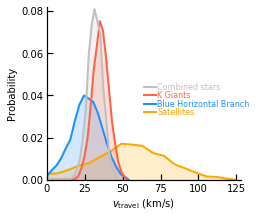

In [7]:

mpl.rcParams['axes.linewidth'] = 1.2
mpl.rcParams['xtick.major.width'] = 1.2
mpl.rcParams['ytick.major.width'] = 1.2
mpl.rcParams['ytick.major.width'] = 1.2
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

mpl.rcParams['xtick.major.size'] = 6.
mpl.rcParams['xtick.minor.size'] = 4.
mpl.rcParams['ytick.major.size'] = 6.
mpl.rcParams['ytick.minor.size'] = 4.

dictnames = [SAT,BHB,KGiants,ALL]
compname = ['Satellites','Blue Horizontal Branch','K Giants','Combined stars']
colorlist = ['cyan','dodgerblue','indianred','silver']
colorlist = ['orange','dodgerblue','indianred','silver']
colorlist = ['orange','dodgerblue','tomato','silver']



nbins = 18
fig = plt.figure(figsize=(3.5,3))
ax = fig.add_axes([0.18,0.15,0.77,0.8])

for idict,dictname in enumerate(dictnames):
        A,B = pr.norm_histogram(dictname['vtravel'],bins=nbins)

        ax.fill_between(A,np.zeros(A.size),B,color=colorlist[idict],alpha=0.2)

for idict,dictname in enumerate(dictnames):
        Aa,Bb = pr.norm_histogram(dictname['vtravel'],bins=nbins)
        A = np.concatenate([[0.],Aa,[1.04*np.nanmax(Aa)]])
        B = np.concatenate([[0.],Bb,[0.]])

        ax.plot(A,B,color=colorlist[idict])#,linestyle='steps-mid')
        ax.text(73.,0.032+idict*0.004,compname[idict],color=colorlist[idict],size=8,va='center')
        ax.plot([64.,72.],[0.032+idict*0.004,0.032+idict*0.004],color=colorlist[idict])
        
ax.axis([0.,128.,0.,0.082])


ax.tick_params(axis="both",which='both',direction="in")

ax.set_xticks(np.arange(0.,126,25.))
ax.set_yticks(np.arange(0.,0.085,0.02))


ax.set_xlabel('$v_{\\rm travel}$ (km/s)',size=10)
ax.set_ylabel('Probability',size=10)

plt.savefig('figures/vtravel_correlated_mcconnachie_40_all.png',dpi=300)

In [8]:

pr.report_posteriors([ALL,KGiants,BHB,SAT])

$v_{\rm travel}$ [km/s] & $32^{+ 4}_{- 4}$ $35^{+ 5}_{- 5}$ $26^{+ 9}_{- 9}$ $55^{+22}_{-23}$ \\
$\ell$ [deg] & $56^{+ 9}_{- 9}$ $53^{+ 9}_{- 9}$ $59^{+25}_{-24}$ $74^{+46}_{-34}$ \\
$b$ [deg] & $-34^{+10}_{- 9}$ $-28^{+10}_{- 9}$ $-42^{+19}_{-16}$ $-49^{+20}_{-17}$ \\
$\langle v_r\rangle$ [km/s] & $-18^{+ 4}_{- 4}$ $-17^{+ 5}_{- 5}$ $-22^{+ 8}_{- 8}$ $-35^{+16}_{-16}$ \\
$\langle v_{\phi}\rangle $ [km/s] & $-20^{+ 5}_{- 4}$ $-22^{+ 5}_{- 5}$ $-9^{+ 9}_{- 9}$ $-25^{+20}_{-20}$ \\
$\langle v_{\theta}\rangle$ [km/s] & $14^{+ 5}_{- 5}$ $18^{+ 6}_{- 6}$ $-2^{+10}_{- 9}$ $-19^{+25}_{-24}$ \\
$\sigma_{h,{\rm los}}$ [km/s] & $93^{+ 2}_{- 2}$ $94^{+ 3}_{- 3}$ $91^{+ 3}_{- 4}$ $92^{+13}_{-10}$ \\
$\sigma_{h,\ell}$ [km/s] & $81^{+ 4}_{- 4}$ $81^{+ 4}_{- 4}$ $76^{+ 8}_{- 8}$ $102^{+15}_{-12}$ \\
$\sigma_{h,b}$ [km/s] & $76^{+ 3}_{- 3}$ $71^{+ 3}_{- 3}$ $96^{+ 8}_{- 7}$ $108^{+16}_{-13}$ \\


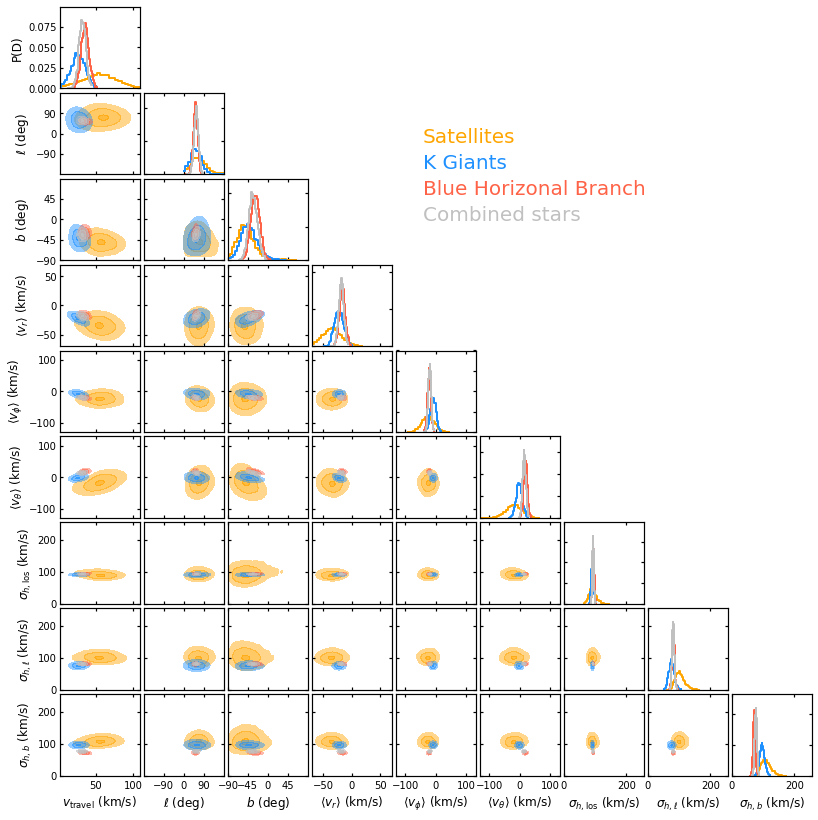

In [9]:

# set specifics for this figure
mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['axes.spines.top'] = True
mpl.rcParams['xtick.major.size'] = 3.
mpl.rcParams['xtick.minor.size'] = 1.5
mpl.rcParams['ytick.major.size'] = 3.
mpl.rcParams['ytick.minor.size'] = 1.5
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10



usecats = ['vtravel','phi','theta','vra','vphi','vth','sigmar','sigmap','sigmat']


decoded = ['$v_{\\rm travel}$ (km/s)','$\ell$ (deg)','$b$ (deg)',\
           '$\\langle v_r\\rangle$ (km/s)','$\\langle v_{\\phi}\\rangle $ (km/s)','$\\langle v_{\\theta}\\rangle$ (km/s)',\
          '$\\sigma_{h,{\\rm los}}$ (km/s)','$\\sigma_{h,\ell}$ (km/s)','$\\sigma_{h,b}$ (km/s)']


dictnames = [SAT,BHB,KGiants,ALL]
colorlist = ['orange','dodgerblue','tomato','silver']

# set the boundaries for plotting
bounddict['phi']    = [-180.,180.]
bounddict['theta']  = [-90.,90]
bounddict['vra']    = [-70.,70.]
bounddict['vphi']   = [-130.,130.]
bounddict['vth']    = [-130.,130.]
bounddict['sigmat'] = [0.,255.]
bounddict['sigmap'] = [0.,255.]
bounddict['sigmar'] = [0.,255.]



fig = plt.figure(figsize=(12,12))

xmin = 0.08
ymin = 0.07
ncats = len(usecats)
ncats1 = len(usecats)-1
dx = 0.83/ncats
dy = 0.85/ncats
buf = 0.005

# set the pixel values for contour levels
binset = [85.,94.,99.5]

for u1i,u1 in enumerate(usecats):
    for u2i,u2 in enumerate(usecats):
        if u2i>u1i: continue
        if u2==u1: continue
        #print(ncats-u1i,u2i,u1,u2)
        # u2i is the col
        # u1i is the row
        ax = fig.add_axes([xmin+u2i*(dx+buf),ymin+(ncats-u1i-1)*(dy+buf),dx,dy])
        
        inbounds = [bounddict[u2][0],bounddict[u2][1],\
                 bounddict[u1][0],bounddict[u1][1]]
        #xx,yy,dens,dadb = make_banana(SAT[u2],SAT[u1])
        for idict,dictname in enumerate(dictnames):
            if dictname==ALL:
                pr.plot_banana(ax,dictname,u2,u1,colorlist[idict],border=True,binset=binset)

            elif dictname==SAT:
                if ((u1=='theta')|(u2=='theta')):
                    pr.plot_banana(ax,dictname,u2,u1,colorlist[idict],border=False,bounds=inbounds,binset=[85.,94.,99.5],alphashade=0.15,alphazero=0.3)
                else:
                    pr.plot_banana(ax,dictname,u2,u1,colorlist[idict],border=False,binset=[85.,94.,99.5],alphashade=0.15,alphazero=0.3)
                
            else:
                pr.plot_banana(ax,dictname,u2,u1,colorlist[idict],border=False,binset=binset,alphashade=0.15,alphazero=0.3)


        if (ncats-u1i-1)==0:
            ax.set_xlabel(decoded[u2i],size=12)
        else:
            ax.set_xticklabels(())
            
        if (u2i)==0:
            ax.set_ylabel(decoded[u1i],size=12)
        else:
            ax.set_yticklabels(())
            
        ax.axis(inbounds)
        
        if (u1=='phi'):
            ax.set_yticks([-90.,0.,90.])
            
        if (u2=='phi'):
            ax.set_xticks([-90.,0.,90.])
        
        if (u1=='theta'):
            ax.set_yticks([-90.,-45.,0.,45.])            
    
        if (u2=='theta'):
            ax.set_xticks([-90.,-45.,0.,45.])
        
        ax.yaxis.set_ticks_position('both')
        ax.xaxis.set_ticks_position('both')
        ax.tick_params(axis="y",which='both',direction="in")
        ax.tick_params(axis="x",which='both',direction="in",pad=5)
        

for u1i,u1 in enumerate(usecats):
    ax = fig.add_axes([xmin+u1i*(dx+buf),ymin+(ncats-u1i-1)*(dy+buf),dx,dy])

    for idict,dictname in enumerate(dictnames):
        A,B = pr.norm_histogram(dictname[u1],bins=30)

        ax.plot(A,B,color=colorlist[idict],linestyle='steps-mid')
        
    ax.axis([bounddict[u1][0],bounddict[u1][1],0.,0.12])
    
    ax.axis([bounddict[u1][0],bounddict[u1][1],0.,1.2*np.nanmax(B)])

    if (u1=='phi'):
        #ax.set_xticks([0.,90.,180.,270.])
        ax.set_xticks([-90.,0.,90.])
    if (u1=='theta'):
        ax.set_xticks([-90.,-45.,0.,45.])
        
    if (ncats-u1i-1)>0:
        ax.set_xticklabels(())
    else:
        ax.set_xlabel(decoded[u1i],size=12)
    
    if u1i!=0:
        ax.set_yticklabels(())
    else:
        ax.set_ylabel('P(D)',size=12)
        
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.tick_params(axis="y",which='both',direction="in")
    ax.tick_params(axis="x",which='both',direction="in",pad=5)
    
 
tsize = 20

plt.text( 0.5, 0.73, 'Combined stars', color='silver',size=tsize,ha='left', va='top', transform=fig.transFigure ) 
plt.text( 0.5, 0.76, 'Blue Horizonal Branch', color=colorlist[2],size=tsize,ha='left', va='top', transform=fig.transFigure ) 
plt.text( 0.5, 0.79, 'K Giants', color=colorlist[1],size=tsize,ha='left', va='top', transform=fig.transFigure ) 
plt.text( 0.5, 0.82, 'Satellites', color=colorlist[0],size=tsize,ha='left', va='top', transform=fig.transFigure ) 

#plt.savefig('figures/suppFigure_filtered.png',dpi=300)
#plt.savefig('figures/suppFigure_minimum_mcconnachie_40_noall.png',dpi=300)
plt.savefig('figures/suppFigure_minimum_mcconnachie_40_all.png',dpi=300)







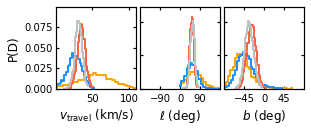

In [10]:

fig = plt.figure(figsize=(12,12))

xmin = 0.08
ymin = 0.07
ncats = len(usecats)
ncats1 = len(usecats)-1
dx = 0.83/ncats
dy = 0.85/ncats
buf = 0.005

for u1i,u1 in enumerate(usecats[0:3]):
    ax = fig.add_axes([xmin+u1i*(dx+buf),ymin,dx,dy])

    for idict,dictname in enumerate(dictnames):
        A,B = pr.norm_histogram(dictname[u1],bins=30)

        ax.plot(A,B,color=colorlist[idict],linestyle='steps-mid')
        
    ax.axis([bounddict[u1][0],bounddict[u1][1],0.,0.12])
    
    ax.axis([bounddict[u1][0],bounddict[u1][1],0.,1.2*np.nanmax(B)])

    if (u1=='phi'):
        #ax.set_xticks([0.,90.,180.,270.])
        ax.set_xticks([-90.,0.,90.])
    if (u1=='theta'):
        ax.set_xticks([-45.,0.,45.])
        
    #if (ncats-u1i-1)>0:
    #    ax.set_xticklabels(())
    #else:
    ax.set_xlabel(decoded[u1i],size=12)
    
    if u1i!=0:
        ax.set_yticklabels(())
    else:
        ax.set_ylabel('P(D)',size=12)
        
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.tick_params(axis="y",which='both',direction="in")
    ax.tick_params(axis="x",which='both',direction="in",pad=5)
    

plt.savefig('figures/just_reflex_histogram.png',dpi=300)



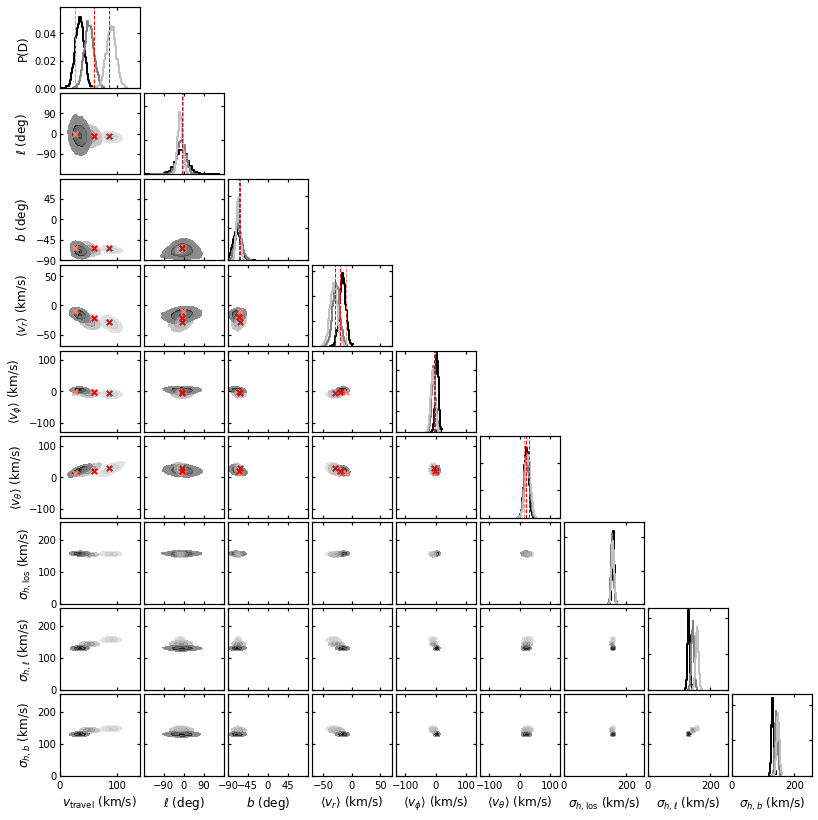

In [12]:


mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['axes.spines.top'] = True

usecats = ['vtravel','phi','theta','vra','vphi','vth','sigmar','sigmap','sigmat']

mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

decoded = ['$v_{\\rm travel}$ (km/s)','$\ell$ (deg)','$b$ (deg)',\
           '$\\langle v_r\\rangle$ (km/s)','$\\langle v_{\\phi}\\rangle $ (km/s)','$\\langle v_{\\theta}\\rangle$ (km/s)',\
          '$\\sigma_{h,{\\rm los}}$ (km/s)','$\\sigma_{h,\ell}$ (km/s)','$\\sigma_{h,b}$ (km/s)']



dictnames = [S13,S14,S15]
colorlist = ['black','grey','silver']
colorlist2 = ['salmon','red','firebrick']




firsttime = True

# override angular bounddict coordinates
bounddict['vtravel'] = [0.,140.]
bounddict['phi'] = [-180.,180.]
#bounddict['phi'] = [0.,360.]
bounddict['theta'] = [-90.,90]
bounddict['vra'] = [-70.,70.]
bounddict['vphi'] = [-130.,130.]
bounddict['vth'] = [-130.,130.]

bounddict['sigmat'] = [0.,255.]
bounddict['sigmap'] = [0.,255.]
bounddict['sigmar'] = [0.,255.]

if firsttime:
    for dictval in dictnames:
        dictval['phi'][dictval['phi']>180.] -= 360.
        #dictval['phi'] *= -1.


fig = plt.figure(figsize=(12,12))

xmin = 0.08
ymin = 0.07
ncats = len(usecats)
ncats1 = len(usecats)-1
dx = 0.83/ncats
dy = 0.85/ncats
buf = 0.005

binset = [75.,92.,99.5]

for u1i,u1 in enumerate(usecats):
    for u2i,u2 in enumerate(usecats):
        if u2i>u1i: continue
        if u2==u1: continue
        #print(ncats-u1i,u2i,u1,u2)
        

        # u2i is the col
        # u1i is the row
        ax = fig.add_axes([xmin+u2i*(dx+buf),ymin+(ncats-u1i-1)*(dy+buf),dx,dy])
        
        if ((u1=='phi') & (u2=='vtravel')):
            ax.scatter([27],[-3.],color=colorlist2[0],marker='x',s=30.,zorder=100)
            ax.scatter([59],[-10.],color=colorlist2[1],marker='x',s=30.,zorder=100)
            ax.scatter([87],[-10.],color=colorlist2[2],marker='x',s=30.,zorder=100)     

        if ((u1=='theta') & (u2=='vtravel')):
            ax.scatter([27],[-63.],color=colorlist2[0],marker='x',s=30.,zorder=100)
            ax.scatter([59],[-64.],color=colorlist2[1],marker='x',s=30.,zorder=100)
            ax.scatter([87],[-63.],color=colorlist2[2],marker='x',s=30.,zorder=100)     
        
        if ((u1=='vra') & (u2=='vtravel')):
            ax.scatter([27],[-10],color=colorlist2[0],marker='x',s=30.,zorder=100)
            ax.scatter([59],[-21],color=colorlist2[1],marker='x',s=30.,zorder=100)
            ax.scatter([87],[-29.],color=colorlist2[2],marker='x',s=30.,zorder=100)     

        if ((u1=='vphi') & (u2=='vtravel')):
            ax.scatter([27],[-1],color=colorlist2[0],marker='x',s=30.,zorder=100)
            ax.scatter([59],[-2],color=colorlist2[1],marker='x',s=30.,zorder=100)
            ax.scatter([87],[-5.],color=colorlist2[2],marker='x',s=30.,zorder=100)     

        if ((u1=='vth') & (u2=='vtravel')):
            ax.scatter([27],[14],color=colorlist2[0],marker='x',s=30.,zorder=100)
            ax.scatter([59],[20],color=colorlist2[1],marker='x',s=30.,zorder=100)
            ax.scatter([87],[30],color=colorlist2[2],marker='x',s=30.,zorder=100)     
                        
        if ((u2=='phi') & (u1=='theta')):
            ax.scatter([-3],[-63],color=colorlist2[0],marker='x',s=30.,zorder=100)
            ax.scatter([-10],[-64],color=colorlist2[1],marker='x',s=30.,zorder=100)
            ax.scatter([-10],[-63],color=colorlist2[2],marker='x',s=30.,zorder=100)     
            
        if ((u2=='phi') & (u1=='vra')):
            ax.scatter([-3],[-10],color=colorlist2[0],marker='x',s=30.,zorder=100)
            ax.scatter([-10],[-21],color=colorlist2[1],marker='x',s=30.,zorder=100)
            ax.scatter([-10],[-29],color=colorlist2[2],marker='x',s=30.,zorder=100)     
            
        if ((u2=='phi') & (u1=='vphi')):
            ax.scatter([-3],[-1],color=colorlist2[0],marker='x',s=30.,zorder=100)
            ax.scatter([-10],[-2],color=colorlist2[1],marker='x',s=30.,zorder=100)
            ax.scatter([-10],[-5],color=colorlist2[2],marker='x',s=30.,zorder=100)     
            
        if ((u2=='phi') & (u1=='vth')):
            ax.scatter([-3],[14],color=colorlist2[0],marker='x',s=30.,zorder=100)
            ax.scatter([-10],[20],color=colorlist2[1],marker='x',s=30.,zorder=100)
            ax.scatter([-10],[30],color=colorlist2[2],marker='x',s=30.,zorder=100)     
            
        if ((u1=='vra') & (u2=='theta')):
            ax.scatter([-63],[-10],color=colorlist2[0],marker='x',s=30.,zorder=100)
            ax.scatter([-64],[-20],color=colorlist2[1],marker='x',s=30.,zorder=100)
            ax.scatter([-63],[-29],color=colorlist2[2],marker='x',s=30.,zorder=100)     
                                                           
        if ((u1=='vphi') & (u2=='theta')):
            ax.scatter([-63],[-1],color=colorlist2[0],marker='x',s=30.,zorder=100)
            ax.scatter([-64],[-2],color=colorlist2[1],marker='x',s=30.,zorder=100)
            ax.scatter([-63],[-5],color=colorlist2[2],marker='x',s=30.,zorder=100)     
                                                           
        if ((u1=='vth') & (u2=='theta')):
            ax.scatter([-63],[14],color=colorlist2[0],marker='x',s=30.,zorder=100)
            ax.scatter([-64],[20],color=colorlist2[1],marker='x',s=30.,zorder=100)
            ax.scatter([-63],[30],color=colorlist2[2],marker='x',s=30.,zorder=100)     
                                                           
        if ((u1=='vphi') & (u2=='vra')):
            ax.scatter([-10],[-1],color=colorlist2[0],marker='x',s=30.,zorder=100)
            ax.scatter([-21],[-2],color=colorlist2[1],marker='x',s=30.,zorder=100)
            ax.scatter([-29],[-5],color=colorlist2[2],marker='x',s=30.,zorder=100)     
                                                           
        if ((u1=='vth') & (u2=='vra')):
            ax.scatter([-10],[14],color=colorlist2[0],marker='x',s=30.,zorder=100)
            ax.scatter([-21],[20],color=colorlist2[1],marker='x',s=30.,zorder=100)
            ax.scatter([-29],[30],color=colorlist2[2],marker='x',s=30.,zorder=100)     
                                                           
        if ((u1=='vth') & (u2=='vphi')):
            ax.scatter([-1],[14],color=colorlist2[0],marker='x',s=30.,zorder=100)
            ax.scatter([-2],[20],color=colorlist2[1],marker='x',s=30.,zorder=100)
            ax.scatter([-5],[30],color=colorlist2[2],marker='x',s=30.,zorder=100)     
                                                           
                                                                         
        inbounds = [bounddict[u2][0],bounddict[u2][1],\
                 bounddict[u1][0],bounddict[u1][1]]
        #xx,yy,dens,dadb = make_banana(SAT[u2],SAT[u1])
        for idict,dictname in enumerate(dictnames):
            if dictname==ALL:
                pr.plot_banana(ax,dictname,u2,u1,colorlist[idict],border=True,binset=binset)

            elif dictname==SAT:
                if ((u1=='theta')|(u2=='theta')):
                    pr.plot_banana(ax,dictname,u2,u1,colorlist[idict],border=False,bounds=inbounds,binset=[85.,94.,99.5],alphashade=0.15,alphazero=0.3)
                else:
                    pr.plot_banana(ax,dictname,u2,u1,colorlist[idict],border=False,binset=[85.,94.,99.5],alphashade=0.15,alphazero=0.3)
                
            else:
                pr.plot_banana(ax,dictname,u2,u1,colorlist[idict],border=False,binset=binset,alphashade=0.15,alphazero=0.3)
        
        if (ncats-u1i-1)==0:
            ax.set_xlabel(decoded[u2i],size=12)
        else:
            ax.set_xticklabels(())
            
        if (u2i)==0:
            ax.set_ylabel(decoded[u1i],size=12)
        else:
            ax.set_yticklabels(())
            
        ax.axis(inbounds)
        
        if (u1=='phi'):
            #ax.set_yticks([0.,90.,180.,270.])
            ax.set_yticks([-90.,0.,90.])

            
        if (u2=='phi'):
            #ax.set_xticks([0.,90.,180.,270.])
            ax.set_xticks([-90.,0.,90.])
            
        if (u1=='theta'):
            ax.set_yticks([-90.,-45.,0.,45.])            
    
        if (u2=='theta'):
            ax.set_xticks([-90.,-45.,0.,45.])
        
        ax.yaxis.set_ticks_position('both')
        ax.xaxis.set_ticks_position('both')
        ax.tick_params(axis="y",which='both',direction="in")
        ax.tick_params(axis="x",which='both',direction="in",pad=5)
        

for u1i,u1 in enumerate(usecats):
    ax = fig.add_axes([xmin+u1i*(dx+buf),ymin+(ncats-u1i-1)*(dy+buf),dx,dy])

    for idict,dictname in enumerate(dictnames):
        A,B = pr.norm_histogram(dictname[u1],bins=30)

        ax.plot(A,B,color=colorlist[idict],linestyle='steps-mid')
        
    ax.axis([bounddict[u1][0],bounddict[u1][1],0.,0.12])
    
    ax.axis([bounddict[u1][0],bounddict[u1][1],0.,1.3*np.nanmax(B)])
    
    if u1=='vtravel':
        ax.plot([27,27],[0.,1.3*np.nanmax(B)],color=colorlist2[0],linestyle='dashed',lw=1.)
        ax.plot([59,59],[0.,1.3*np.nanmax(B)],color=colorlist2[1],linestyle='dashed',lw=1.)
        ax.plot([87,87],[0.,1.3*np.nanmax(B)],color=colorlist2[2],linestyle='dashed',lw=1.)

    if u1=='phi':
        ax.plot([-3,-3],[0.,1.3*np.nanmax(B)],color=colorlist2[0],linestyle='dashed',lw=1.)
        ax.plot([-10,-10],[0.,1.3*np.nanmax(B)],color=colorlist2[1],linestyle='dashed',lw=1.)
        ax.plot([-10,-10],[0.,1.3*np.nanmax(B)],color=colorlist2[2],linestyle='dashed',lw=1.)

    if u1=='theta':
        ax.plot([-63,-63],[0.,1.3*np.nanmax(B)],color=colorlist2[0],linestyle='dashed',lw=1.)
        ax.plot([-64,-64],[0.,1.3*np.nanmax(B)],color=colorlist2[1],linestyle='dashed',lw=1.)
        ax.plot([-63,-63],[0.,1.3*np.nanmax(B)],color=colorlist2[2],linestyle='dashed',lw=1.)

    if u1=='vra':
        ax.plot([-10,-10],[0.,1.3*np.nanmax(B)],color=colorlist2[0],linestyle='dashed',lw=1.)
        ax.plot([-21,-21],[0.,1.3*np.nanmax(B)],color=colorlist2[1],linestyle='dashed',lw=1.)
        ax.plot([-29,-29],[0.,1.3*np.nanmax(B)],color=colorlist2[2],linestyle='dashed',lw=1.)

    if u1=='vphi':
        ax.plot([-1,-1],[0.,1.3*np.nanmax(B)],color=colorlist2[0],linestyle='dashed',lw=1.)
        ax.plot([-2,-2],[0.,1.3*np.nanmax(B)],color=colorlist2[1],linestyle='dashed',lw=1.)
        ax.plot([-5,-5],[0.,1.3*np.nanmax(B)],color=colorlist2[2],linestyle='dashed',lw=1.)

    if u1=='vth':
        ax.plot([14,14],[0.,1.3*np.nanmax(B)],color=colorlist2[0],linestyle='dashed',lw=1.)
        ax.plot([20,20],[0.,1.3*np.nanmax(B)],color=colorlist2[1],linestyle='dashed',lw=1.)
        ax.plot([30,30],[0.,1.3*np.nanmax(B)],color=colorlist2[2],linestyle='dashed',lw=1.)








    if (u1=='phi'):
        #ax.set_xticks([0.,90.,180.,270.])
        ax.set_xticks([-90.,0.,90.])
    if (u1=='theta'):
        ax.set_xticks([-90.,-45.,0.,45.])
        
    if (ncats-u1i-1)>0:
        ax.set_xticklabels(())
    else:
        ax.set_xlabel(decoded[u1i],size=12)
    
    if u1i!=0:
        ax.set_yticklabels(())
    else:
        ax.set_ylabel('P(D)',size=12)
        
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.tick_params(axis="y",which='both',direction="in")
    ax.tick_params(axis="x",which='both',direction="in",pad=5)
    
   
tsize = 20

'''
plt.text( 0.5, 0.82, '$1\\times10^{11}M_\odot$', color=colorlist[0],size=tsize,ha='left', va='top', transform=fig.transFigure ) 
plt.text( 0.5, 0.79, '$2\\times10^{11}M_\odot$', color=colorlist[1],size=tsize,ha='left', va='top', transform=fig.transFigure ) 
plt.text( 0.5, 0.76, '$3\\times10^{11}M_\odot$', color=colorlist[2],size=tsize,ha='left', va='top', transform=fig.transFigure ) 

plt.text( 0.64, 0.82, '(truth)', color=colorlist2[0],size=tsize,ha='left', va='top', transform=fig.transFigure ) 
plt.text( 0.64, 0.79, '(truth)', color=colorlist2[1],size=tsize,ha='left', va='top', transform=fig.transFigure ) 
plt.text( 0.64, 0.76, '(truth)', color=colorlist2[2],size=tsize,ha='left', va='top', transform=fig.transFigure ) 
'''


plt.savefig('figures/mock_comp.png',dpi=300)










